In [24]:
import matplotlib.pyplot as mpl
import math as m
import numpy as np
import random as rnd

# добавить описание функций
# добавить визуализацию методов - прямоугольники, трапеции и тд строго по соответветствующим функциями поместить на графике вместе с m_func
# чтобы было видно как определяется площадь под графиком

def m_func(x):

    return m.cos(x)*m.sin(x)

start = 0
end = 1
ref = 1/2 - (m.cos(1)**2)/2

def integral_left_rec(func, num):

    integral = 0
    h = (end - start)/num
    x = start

    for i in range(num):

        integral += (func(x)*h)
        x += h

    return integral

def integral_right_rec(func, num):

    integral = 0
    h = (end - start)/num
    x = start

    for i in range(num - 1):

        x += h
        integral += (func(x)*h)

    integral += (func(x)*h)

    return integral

def integral_trapeze(func, num):

    integral = 0
    h = (end - start)/num
    x = start

    for i in range(num - 1):

        integral += ((func(x) + func(x + h))/2*h)
        x += h

    integral += ((func(x) + func(x - h))/2*h)

    return integral

def integral_mid_rec(func, num):

    integral = 0
    h = (end - start)/num
    x = start

    for i in range(num):

        integral += (func(x + h/2)*h)
        x += h

    return integral

def integral_simpson(func, num):

    integral = 0
    h = (end - start)/num
    x = start

    for i in range(num - 1):

        integral += ((func(x) + func(x + h) + 4*func(x + h/2))/6*h)
        x += h

    integral += ((func(x) + func(x - h) + 4*func(x - h/2))/6*h)

    return integral


def integral_montecarlo(func, num):

    integral = 0
    rnd.seed()

    for i in range(num):

        x = rnd.random()*(end - start)
        y = rnd.random()*(end - start)

        if y <= func(x):    integral += 1

    return integral/num

h_list = []
left_list = []
right_list = []
mid_list = []
trapeze_list = []
simpson_list = []
montecarlo_list = []

num = 200

eps = 1E-5
b_0 = eps**3 / 3
m_func = lambda x: 1/(x)**(1/2)

num = 200

start = b_0
end = 1
integral_part2 = integral_mid_rec(m_func, num)
integral = integral_part2
ref = 2
print("Несобственный интеграл", integral, 2)

Несобственный интеграл 1.9572277275625 2


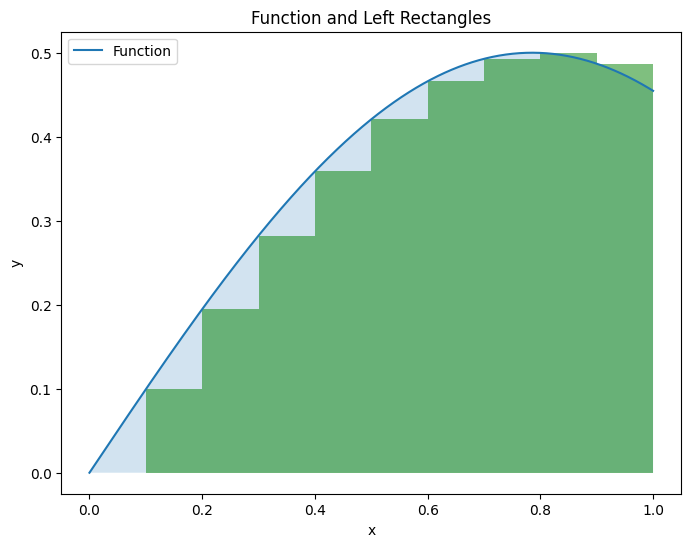

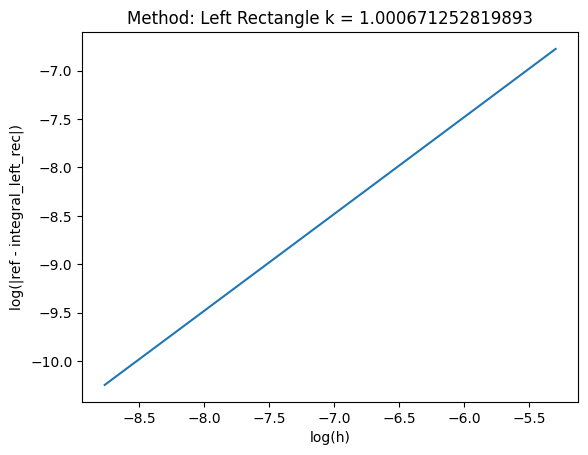

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def m_func(x):
    return np.cos(x) * np.sin(x)

def integral_left_rec(func, num):
    integral = 0
    h = (end - start) / num
    x = start

    for i in range(num):
        integral += func(x) * h
        x += h

    return integral

start = 0
end = 1
ref = 1 / 2 - (np.cos(1) ** 2) / 2

h_list = []
left_list = []

num = 200

for i in range(6):
    h_list.append(np.log((end - start) / num))
    left_list.append(np.log(abs(ref - integral_left_rec(m_func, num))))
    num *= 2

# График функции
x_vals = np.linspace(start, end, 1000)
y_vals = m_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function')
plt.fill_between(x_vals, y_vals, alpha=0.2)

# Прямоугольники
num_rectangles = 10  # Количество прямоугольников для визуализации
h = (end - start) / num_rectangles
x_rect = np.linspace(start, end - h, num_rectangles)
y_rect = m_func(x_rect)
rectangles = plt.Rectangle((x_rect[0], 0), h, y_rect[0], alpha=0.5, facecolor='green')
plt.gca().add_patch(rectangles)
for i in range(1, num_rectangles):
    rectangles = plt.Rectangle((x_rect[i], 0), h, y_rect[i], alpha=0.5, facecolor='green')
    plt.gca().add_patch(rectangles)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Left Rectangles')
plt.legend()
plt.show()

# График зависимости log(|ref - integral_left_rec|) от log(h)
plt.plot(h_list, left_list, '-')
plt.xlabel('log(h)')
plt.ylabel('log(|ref - integral_left_rec|)')
k, b = np.polyfit(h_list, left_list, 1)
plt.title(f'Method: Left Rectangle k = {k}')
plt.show()

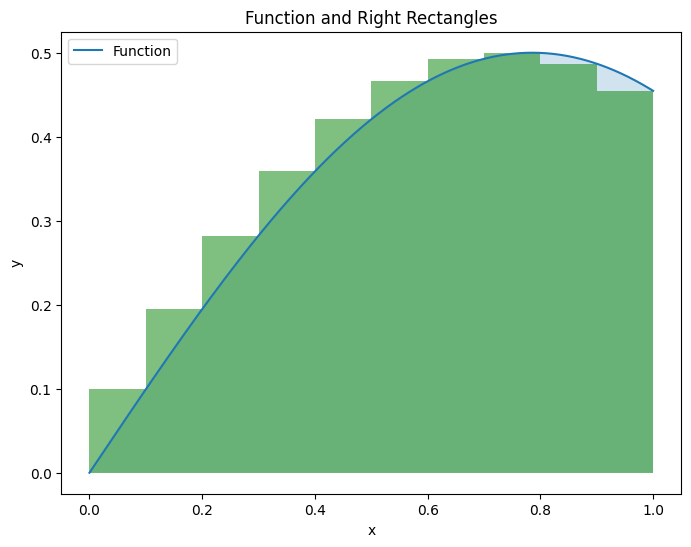

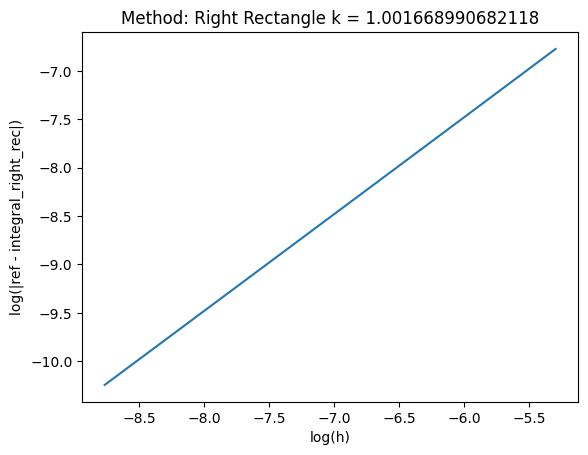

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def m_func(x):
    return np.cos(x) * np.sin(x)

def integral_mid_rec(func, num):

    integral = 0
    h = (end - start)/num
    x = start

    for i in range(num):

        integral += (func(x + h/2)*h)
        x += h

    return integral

start = 0
end = 1
ref = 1 / 2 - (np.cos(1) ** 2) / 2

h_list = []
right_list = []

num = 200

for i in range(6):
    h_list.append(np.log((end - start) / num))
    right_list.append(np.log(abs(ref - integral_right_rec(m_func, num))))
    num *= 2

# График функции
x_vals = np.linspace(start, end, 1000)
y_vals = m_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function')
plt.fill_between(x_vals, y_vals, alpha=0.2)

# Прямоугольники
num_rectangles = 10  # Количество прямоугольников для визуализации
h = (end - start) / num_rectangles
x_rect = np.linspace(start, end - h, num_rectangles)
y_rect = m_func(x_rect + h)
rectangles = plt.Rectangle((x_rect[0], 0), h, y_rect[0], alpha=0.5, facecolor='green')
plt.gca().add_patch(rectangles)
for i in range(1, num_rectangles):
    rectangles = plt.Rectangle((x_rect[i], 0), h, y_rect[i], alpha=0.5, facecolor='green')
    plt.gca().add_patch(rectangles)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Right Rectangles')
plt.legend()
plt.show()

# График зависимости log(|ref - integral_right_rec|) от log(h)
plt.plot(h_list, right_list, '-')
plt.xlabel('log(h)')
plt.ylabel('log(|ref - integral_right_rec|)')
k, b = np.polyfit(h_list, right_list, 1)
plt.title(f'Method: Right Rectangle k = {k}')
plt.show()

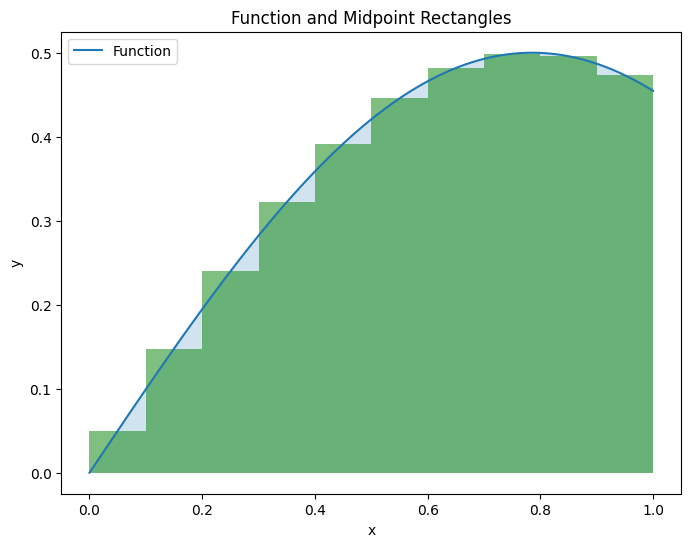

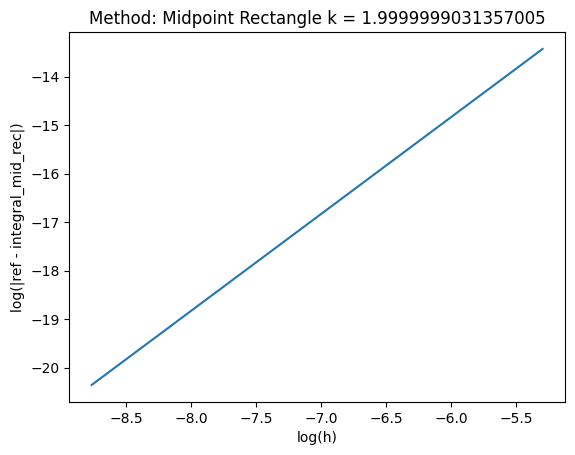

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def m_func(x):
    return np.cos(x) * np.sin(x)

def integral_mid_rec(func, num):
    integral = 0
    h = (end - start) / num
    x = start + h/2

    for i in range(num):
        integral += func(x) * h
        x += h

    return integral

start = 0
end = 1
ref = 1 / 2 - (np.cos(1) ** 2) / 2

h_list = []
mid_list = []

num = 200

for i in range(6):
    h_list.append(np.log((end - start) / num))
    mid_list.append(np.log(abs(ref - integral_mid_rec(m_func, num))))
    num *= 2

# График функции
x_vals = np.linspace(start, end, 1000)
y_vals = m_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function')
plt.fill_between(x_vals, y_vals, alpha=0.2)

# Прямоугольники
num_rectangles = 10  # Количество прямоугольников для визуализации
h = (end - start) / num_rectangles
x_rect = np.linspace(start + h/2, end - h/2, num_rectangles)
y_rect = m_func(x_rect)
rectangles = plt.Rectangle((x_rect[0]-h/2, 0), h, y_rect[0], alpha=0.5, facecolor='green')
plt.gca().add_patch(rectangles)
for i in range(1, num_rectangles):
    rectangles = plt.Rectangle((x_rect[i]-h/2, 0), h, y_rect[i], alpha=0.5, facecolor='green')
    plt.gca().add_patch(rectangles)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Midpoint Rectangles')
plt.legend()
plt.show()

# График зависимости log(|ref - integral_mid_rec|) от log(h)
plt.plot(h_list, mid_list, '-')
plt.xlabel('log(h)')
plt.ylabel('log(|ref - integral_mid_rec|)')
k, b = np.polyfit(h_list, mid_list, 1)
plt.title(f'Method: Midpoint Rectangle k = {k}')
plt.show()

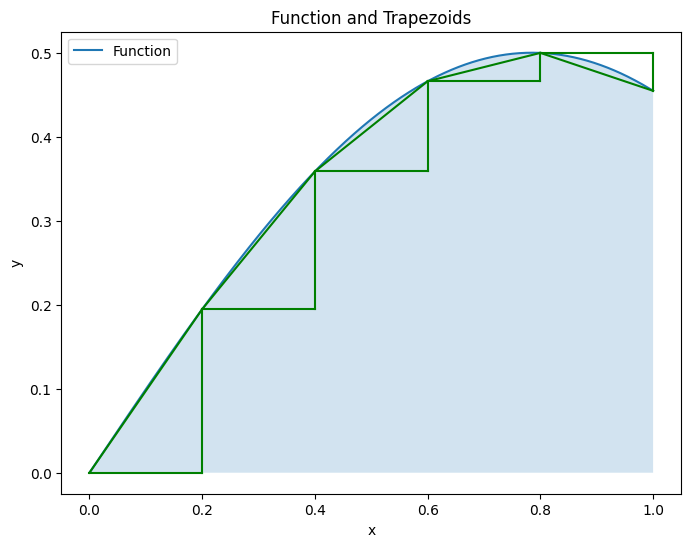

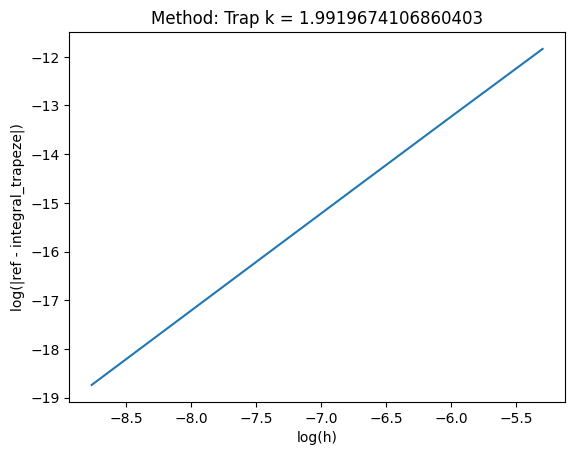

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def m_func(x):
    return np.cos(x) * np.sin(x)

def integral_trapeze(func, num):
    integral = 0
    h = (end - start) / num
    x = start

    for i in range(num - 1):
        integral += ((func(x) + func(x + h))/2) * h
        x += h

    integral += ((func(x) + func(x - h))/2) * h

    return integral

start = 0
end = 1
ref = 1 / 2 - (np.cos(1) ** 2) / 2

h_list = []
trap_list = []

num = 200

for i in range(6):
    h_list.append(np.log((end - start) / num))
    trap_list.append(np.log(abs(ref - integral_trapeze(m_func, num))))
    num *= 2

# График функции
x_vals = np.linspace(start, end, 1000)
y_vals = m_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function')
plt.fill_between(x_vals, y_vals, alpha=0.2)

# Трапеции
num_trapezoids = 5  # Количество трапеций для визуализации
h = (end - start) / num_trapezoids
x_trap = np.linspace(start, end, num_trapezoids + 1)
y_trap = m_func(x_trap)
for i in range(num_trapezoids):
    plt.plot([x_trap[i], x_trap[i+1]], [y_trap[i], y_trap[i]], color='green')
    plt.plot([x_trap[i], x_trap[i+1]], [y_trap[i], y_trap[i+1]], color='green')
    plt.plot([x_trap[i+1], x_trap[i+1]], [y_trap[i], y_trap[i+1]], color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Trapezoids')
plt.legend()
plt.show()

# График зависимости log(|ref - integral_trapeze|) от log(h)
plt.plot(h_list, trap_list, '-')
plt.xlabel('log(h)')
plt.ylabel('log(|ref - integral_trapeze|)')
k, b = np.polyfit(h_list, trap_list, 1)
plt.title(f'Method: Trap k = {k}')
plt.show()

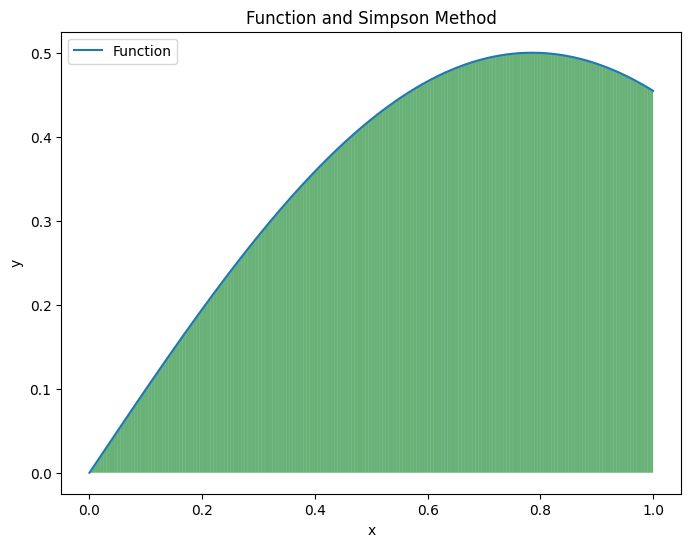

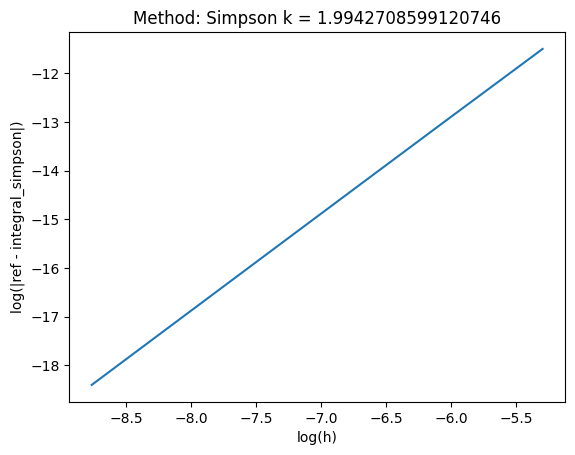

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def m_func(x):
    return np.cos(x) * np.sin(x)

def integral_simpson(func, num):
    integral = 0
    h = (end - start) / num
    x = start

    for i in range(num - 1):
        integral += ((func(x) + func(x + h) + 4*func(x + h/2))/6) * h
        x += h

    integral += ((func(x) + func(x - h) + 4*func(x - h/2))/6) * h

    return integral

start = 0
end = 1
ref = 1 / 2 - (np.cos(1) ** 2) / 2

h_list = []
simp_list = []

num = 200

for i in range(6):
    h_list.append(np.log((end - start) / num))
    simp_list.append(np.log(abs(ref - integral_simpson(m_func, num))))
    num *= 2

# График функции
x_vals = np.linspace(start, end, 1000)
y_vals = m_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function')
plt.fill_between(x_vals, y_vals, alpha=0.2)

# Симпсон
num_segments = 200  # Количество сегментов для визуализации
h = (end - start) / num_segments
x_seg = np.linspace(start, end, num_segments + 1)
y_seg = m_func(x_seg)
for i in range(num_segments):
    x = np.linspace(x_seg[i], x_seg[i+1], 100)
    y = m_func(x)
    plt.fill_between(x, y, alpha=0.5, facecolor='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Simpson Method')
plt.legend()
plt.show()

# График зависимости log(|ref - integral_simpson|) от log(h)
plt.plot(h_list, simp_list, '-')
plt.xlabel('log(h)')
plt.ylabel('log(|ref - integral_simpson|)')
k, b = np.polyfit(h_list, simp_list, 1)
plt.title(f'Method: Simpson k = {k}')
plt.show()

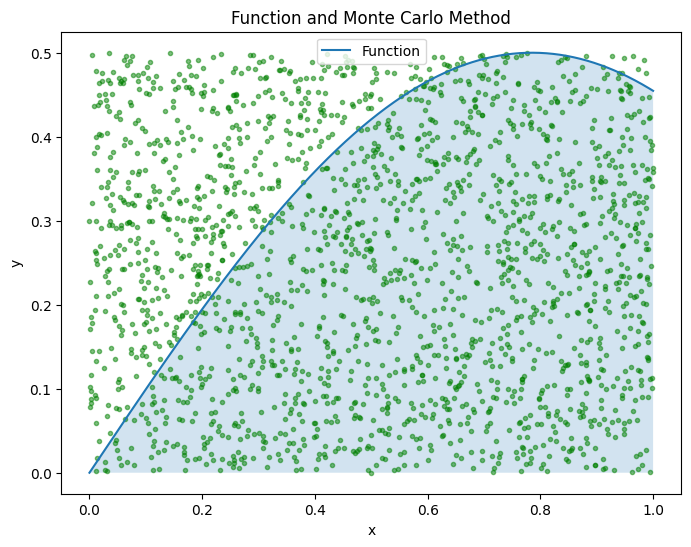

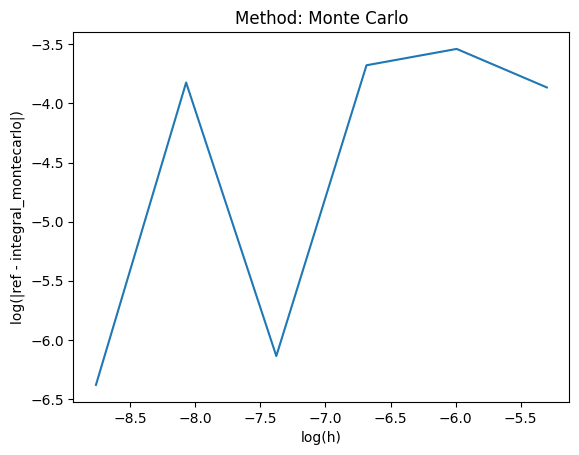

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

def m_func(x):
    return np.cos(x) * np.sin(x)

def integral_montecarlo(func, num):
    integral = 0
    rnd.seed()

    for i in range(num):
        x = rnd.random()*(end - start)
        y = rnd.random()*(end - start)

        if y <= func(x):
            integral += 1

    return integral/num

start = 0
end = 1
ref = 1 / 2 - (np.cos(1) ** 2) / 2

h_list = []
mc_list = []

num = 200

for i in range(6):
    h_list.append(np.log((end - start) / num))
    mc_list.append(np.log(abs(ref - integral_montecarlo(m_func, num))))
    num *= 2

# Plotting the function
x_vals = np.linspace(start, end, 1000)
y_vals = m_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function')
plt.fill_between(x_vals, y_vals, alpha=0.2)

# Monte Carlo method
num_points = 2000  # Number of points for visualization
x_points = np.random.uniform(start, end, num_points)
y_points = np.random.uniform(0, max(y_vals), num_points)
plt.scatter(x_points, y_points, marker='.', color='green', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Monte Carlo Method')
plt.legend()
plt.show()

# Plotting the dependency log(|ref - integral_montecarlo|) vs log(h)
plt.plot(h_list, mc_list, '-')
plt.xlabel('log(h)')
plt.ylabel('log(|ref - integral_montecarlo|)')
plt.title('Method: Monte Carlo')
plt.show()